In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('./datasets/creditcard.csv')

In [3]:
#scaling
rob_scaler = RobustScaler()

In [4]:
#scale the columns
scaled_amount=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [5]:
#replace the amount and time with the scaled ones
df.drop(['Time','Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [6]:
#spliting the data
x=df.drop('Class', axis=1)
y=df['Class']
sfk =StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
for train_index, test_index in sfk.split(x, y):
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
original_Xtrain1 = original_Xtrain.values
original_Xtest1 = original_Xtest.values
original_ytrain1 = original_ytrain.values
original_ytest1 = original_ytest.values

In [10]:
#evaluate the dataset after scaling data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# Decision tree
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(X_train, y_train)
decisionTree_pred = decisionTree_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP','Decision Tree']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred),precision_score(y_test, decisionTree_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred),recall_score(y_test, decisionTree_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred),f1_score(y_test, decisionTree_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after scaling&&StratifiedKFold')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

NameError: name 'y_test' is not defined

In [17]:
print(models)
print("precision_scores",end=" ")
print(precision_scores)
print("recall_scores",end=" ")
print(recall_scores)
print("f1_scores",end=" ")
print(f1_scores)

['Logistic Regression', 'SVM', 'k-NN', 'MLP', 'Decision Tree']
precision_scores [0.8636363636363636, 0.9701492537313433, 0.948051948051948, 0.8541666666666666, 0.7117117117117117]
recall_scores [0.5816326530612245, 0.6632653061224489, 0.7448979591836735, 0.8367346938775511, 0.8061224489795918]
f1_scores [0.6951219512195121, 0.7878787878787878, 0.8342857142857143, 0.845360824742268, 0.7559808612440191]


In [11]:
#Implementation of the training model Boosting
#first we will use AdaBoost
boosting_model_tree = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=123)
#fiting the modek
boosting_model_tree.fit(original_Xtrain, original_ytrain)
#prediction
y_pred_tree = boosting_model_tree.predict(original_Xtest)


In [18]:
#evaluation

precision_ada_tree=precision_score(original_ytest, y_pred_tree)
recal_ada_tree=recall_score(original_ytest, y_pred_tree)
f1_ad_tree=f1_score(original_ytest, y_pred_tree)


TypeError: Singleton array 0.26 cannot be considered a valid collection.

In [12]:
print(precision_ada_tree)
print(recal_ada_tree)
print(f1_ad_tree)

1.0
0.25609756097560976
0.4077669902912621


In [7]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier


In [13]:
# XGBoost
boosting_model_xgboost = xgb.XGBClassifier(n_estimators=100)
boosting_model_xgboost.fit(original_Xtrain, original_ytrain)
y_pred_xgboost = boosting_model_xgboost.predict(original_Xtest)
# LightGBM
boosting_model_lightgbm = lgb.LGBMClassifier(n_estimators=100)
boosting_model_lightgbm.fit(original_Xtrain, original_ytrain)
y_pred_lightgbm = boosting_model_lightgbm.predict(original_Xtest)
# GBM (Gradient Boosting Machine)
boosting_model_gbm = GradientBoostingClassifier(n_estimators=100)
boosting_model_gbm.fit(original_Xtrain, original_ytrain)
y_pred_gbm = boosting_model_gbm.predict(original_Xtest)
#Gradient Boosting
boosting_model_sklearn = GradientBoostingClassifier(n_estimators=100)
boosting_model_sklearn.fit(original_Xtrain, original_ytrain)
y_pred_sklearn = boosting_model_sklearn.predict(original_Xtest)


In [15]:

precision_sklearn=precision_score(original_ytest, y_pred_sklearn)
recal_sklearn=recall_score(original_ytest, y_pred_sklearn)
f1_sklearn=f1_score(original_ytest, y_pred_sklearn)

precision_gbm=precision_score(original_ytest, y_pred_gbm)
recal_gbm=recall_score(original_ytest, y_pred_gbm)
f1_gbm=f1_score(original_ytest, y_pred_gbm)

precision_xgboost=precision_score(original_ytest, y_pred_xgboost)
recal_xgboost=recall_score(original_ytest, y_pred_xgboost)
f1_xgboost=f1_score(original_ytest, y_pred_xgboost)

precision_lightgbmt=precision_score(original_ytest, y_pred_lightgbm)
recal_lightgbm=recall_score(original_ytest, y_pred_lightgbm)
f1_lightgbm=f1_score(original_ytest, y_pred_lightgbm)


In [19]:

models = ['AdaBoost', 'Gradient Boosting', 'GBM', 'LightGBM','XGBOOST']
precision_scores = [precision_ada_tree, precision_sklearn, precision_gbm, precision_lightgbmt,precision_xgboost]
recall_scores = [recal_ada_tree,recal_sklearn, recal_gbm, recal_lightgbm, recal_xgboost]
f1_scores = [f1_ad_tree,f1_sklearn, f1_gbm, f1_lightgbm, f1_xgboost]

In [20]:
print(models)
print("precision_scores",end=" ")
print(precision_scores)
print("recall_scores",end=" ")
print(recall_scores)
print("f1_scores",end=" ")
print(f1_scores)

['AdaBoost', 'Gradient Boosting', 'GBM', 'LightGBM', 'XGBOOST']
precision_scores [1.0, 0.9038461538461539, 0.9038461538461539, 0.4778761061946903, 0.9836065573770492]
recall_scores [0.25609756097560976, 0.573170731707317, 0.573170731707317, 0.6585365853658537, 0.7317073170731707]
f1_scores [0.4077669902912621, 0.7014925373134329, 0.7014925373134329, 0.553846153846154, 0.8391608391608392]


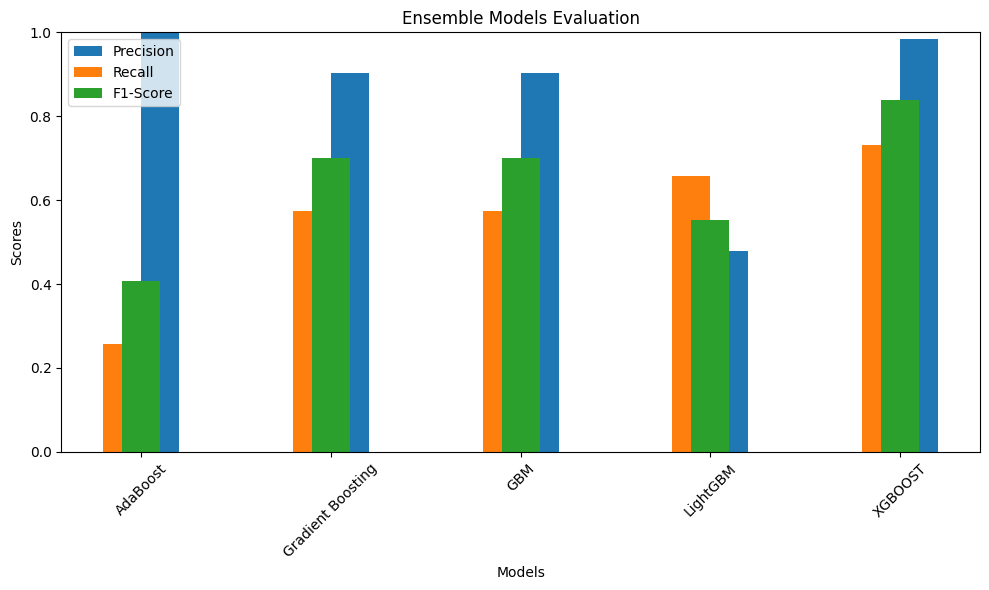

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Ensemble Models Evaluation')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()